In [59]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=f55c4d12957a33044ffdbc237d40b4762e83187e0e1aeafd3bdbc1004572f878
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functions import num_to_years
from sklearn.linear_model import LinearRegression

In [2]:
y = pd.read_csv('credit_record.csv')
X = pd.read_csv('application_record.csv')

In [3]:
X.columns = [i.lower() for i in X.columns]
y.columns = [i.lower() for i in y.columns]

In [4]:
X.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
X.describe()

,id,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [6]:
#We have 18 features and 438557 rows (LOTS OF DATA)
X.shape

(438557, 18)

In [7]:
y.head()

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
#we're going to join the two dfs in order to make meaningful visualiztions
X['month_recorded'] = y['months_balance']
X['status'] = y['status']

## Tyding the data - feature matrix

In [58]:
def num_to_years(num):
    try:
        if num < 0:
            year = num/-365
        else:
            year = 0
    except:
        return None
    return year

In [9]:
def days_to_years(X):
    X['client age'] = X['days_birth'].apply(num_to_years)
    X.drop('days_birth', axis=1)
    X['job_seniority'] = X['days_employed'].apply(num_to_years)
    X.drop('days_employed', axis=1)
    return X

In [11]:
def status_int(s):
    if s=='C':
        return -1
    if s=='X':
        return -2
    else:
        return int(s)


X = days_to_years(X)
X['status'] = X['status'].apply(status_int)
X = X.drop(['days_birth', 'days_employed'], axis=1)
X = X[X['job_seniority'] >=0]
X.describe()

,id,cnt_children,amt_income_total,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,month_recorded,status,client age,job_seniority
count,4.385570e+05,438557.000000,4.385570e+05,438557.0,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,1.0,0.206133,0.287771,0.108207,2.194465,-19.162597,-0.810383,43.829876,5.952062
std,5.716370e+05,0.724882,1.100869e+05,0.0,0.404527,0.452724,0.310642,0.897207,14.030527,0.792943,11.465836,6.568216
min,5.008804e+06,0.000000,2.610000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,-2.000000,20.517808,0.000000
25%,5.609375e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000,-1.000000,34.284932,1.016438
50%,6.047745e+06,0.000000,1.607805e+05,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000,-1.000000,42.821918,4.019178
75%,6.456971e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,-7.000000,0.000000,53.378082,8.501370
max,7.999952e+06,19.000000,6.750000e+06,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,5.000000,69.043836,48.030137


## Visualiztion

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'cnt_children'}>,
        <AxesSubplot:title={'center':'amt_income_total'}>],
       [<AxesSubplot:title={'center':'flag_mobil'}>,
        <AxesSubplot:title={'center':'flag_work_phone'}>,
        <AxesSubplot:title={'center':'flag_phone'}>],
       [<AxesSubplot:title={'center':'flag_email'}>,
        <AxesSubplot:title={'center':'cnt_fam_members'}>,
        <AxesSubplot:title={'center':'month_recorded'}>],
       [<AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'client age'}>,
        <AxesSubplot:title={'center':'job_seniority'}>]], dtype=object)

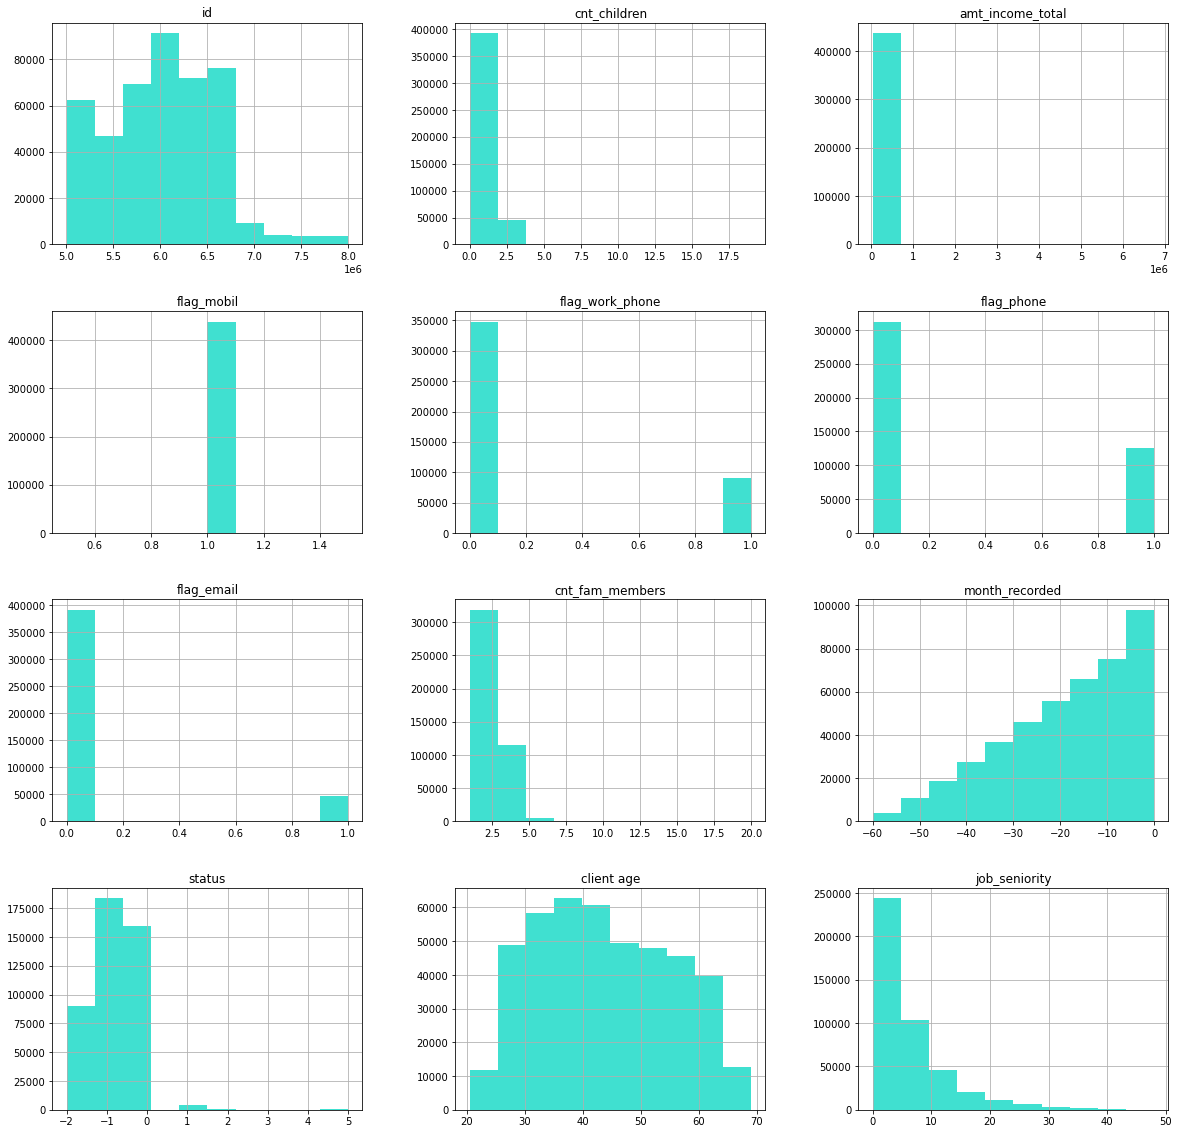

In [12]:
X.hist(figsize=(20,20), bins=10, color='turquoise')

In [39]:
#seems like all clients has a car
X.drop('flag_mobil', axis = 1, inplace = True)

In [13]:
values_count = X['name_family_status'].value_counts()

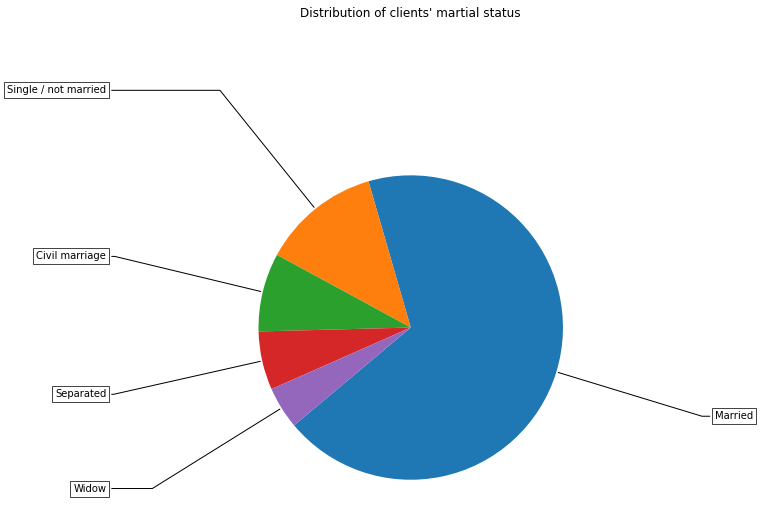

In [14]:
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw=dict(aspect="equal"))

recipe = values_count.index.tolist()


data = values_count



#When you change the width to 0.5 you get a donut chart

wedges, texts = ax.pie(data, wedgeprops=dict(width=1), startangle=-140)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(2*np.sign(x), 2*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title("Distribution of clients' martial status", y= 1.3)

plt.show()

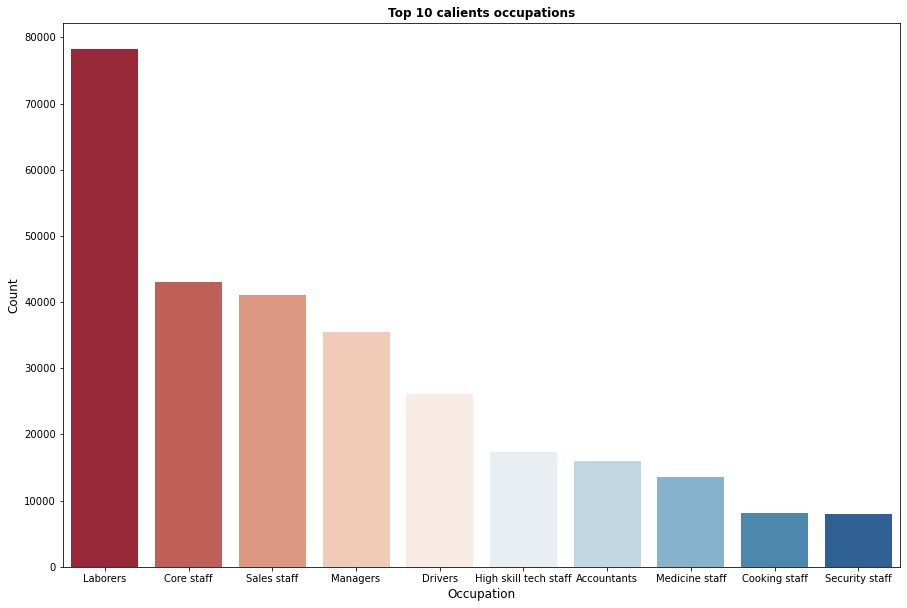

In [15]:
fig, bar = plt.subplots(figsize = (15,10))
sns.countplot(x='occupation_type' ,data=X,
              order=pd.value_counts(X['occupation_type']).iloc[:10].index, palette="RdBu")
plt.title('Top 10 calients occupations', weight='bold')
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

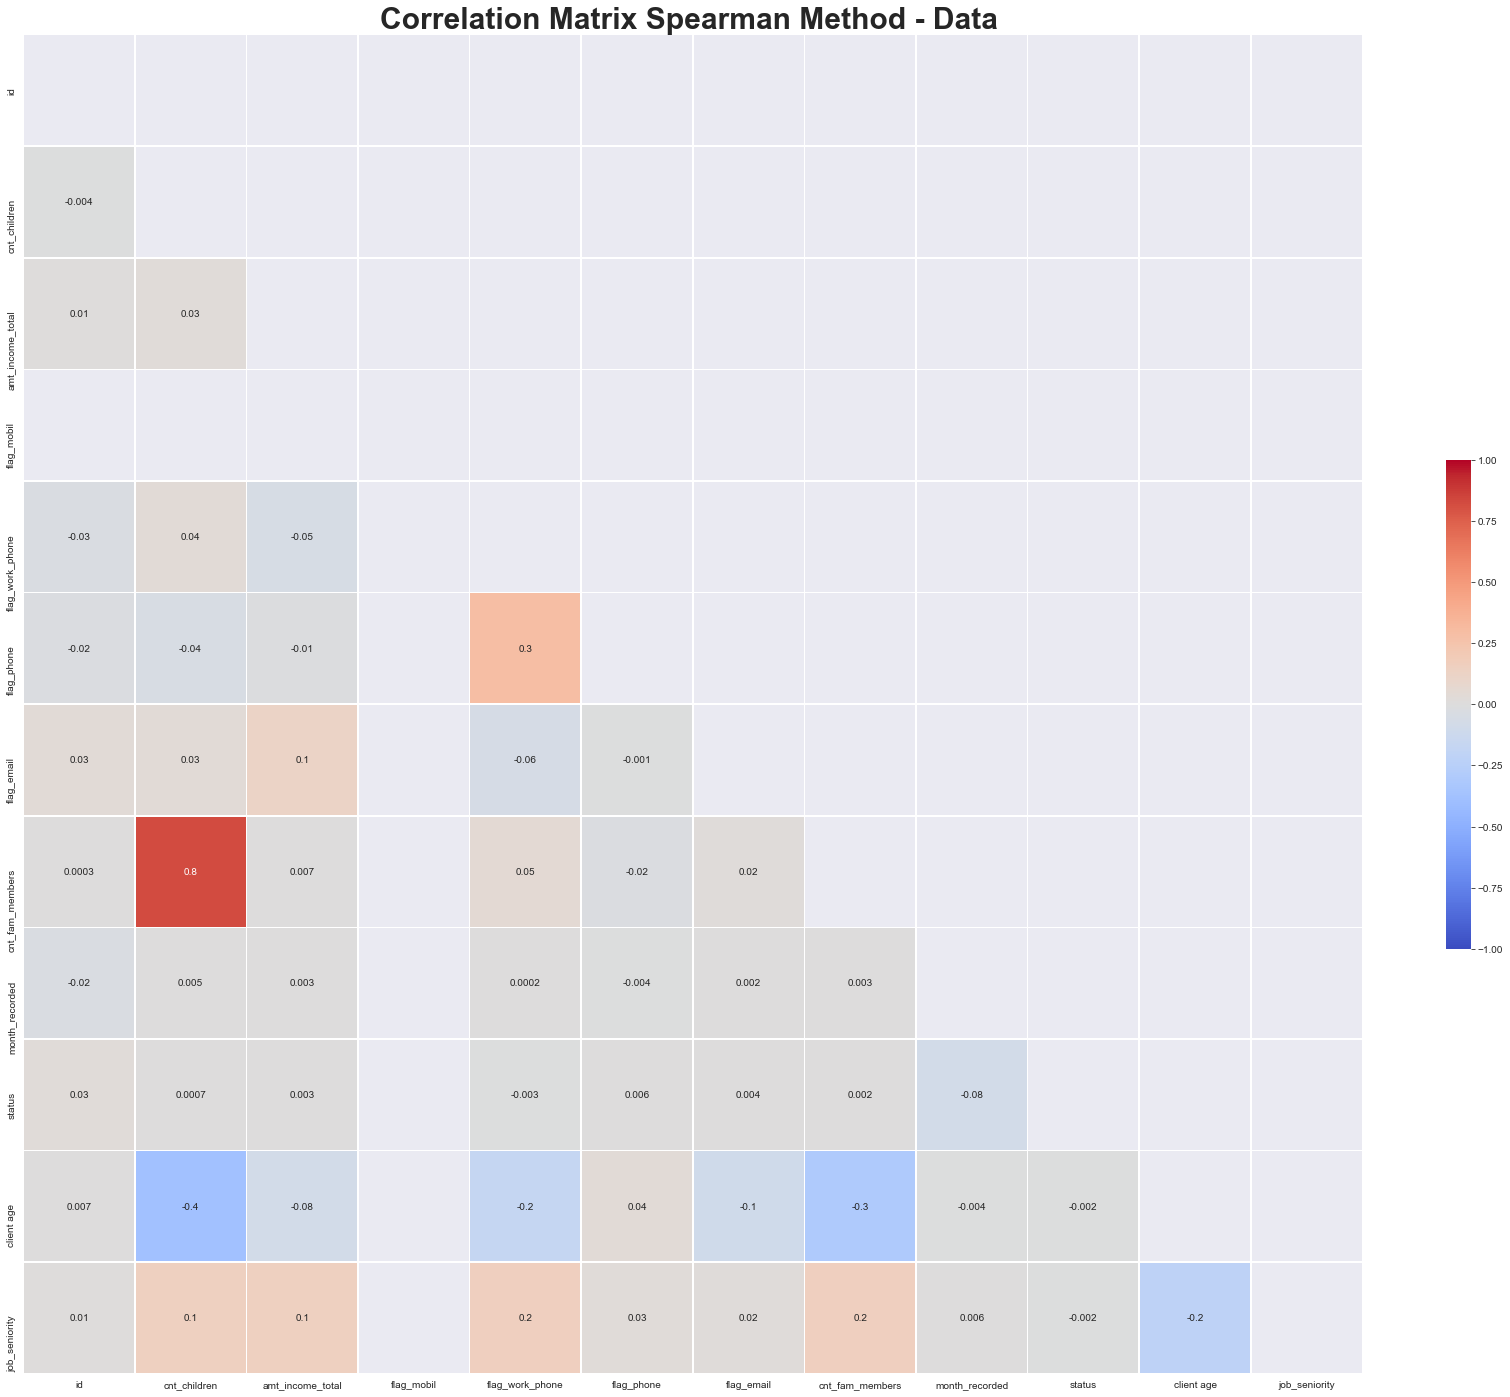

In [16]:
plt.figure(figsize=(30,30))
sns.set_style('darkgrid')
corr=X.corr(method='spearman')
mask_corr = np.triu(np.ones_like(corr, dtype=bool))
heat = sns.heatmap(corr, square=True,
            annot=True, fmt='.1g', linewidths=0.5,
            linecolor='white', cmap= 'coolwarm', mask=mask_corr,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.3},
            annot_kws={"fontsize":10},)
plt.title("Correlation Matrix Spearman Method - Data ",size=30, weight='bold')
plt.show()

we can see that the correlation between the features are very neutral, except for the obvious positive correlation berween family members number and number of kids 

In [50]:
def is_paid(num):
    if num == -2:
        return "Don't have loan for the month"
    if num == -1:
        return 'Paid off for the month'
    else:
        return 'Not paid month'
        
paying_series = X[X.month_recorded == 0]['status'].apply(is_paid)
        

In [51]:
paying_series

0         Don't have loan for the month
4                Paid off for the month
23        Don't have loan for the month
45        Don't have loan for the month
60        Don't have loan for the month
                      ...              
438394           Paid off for the month
438434           Paid off for the month
438470                   Not paid month
438487           Paid off for the month
438519                   Not paid month
Name: status, Length: 14066, dtype: object

Text(0.5, 1.0, "Clients' Loan Status for Current Month")

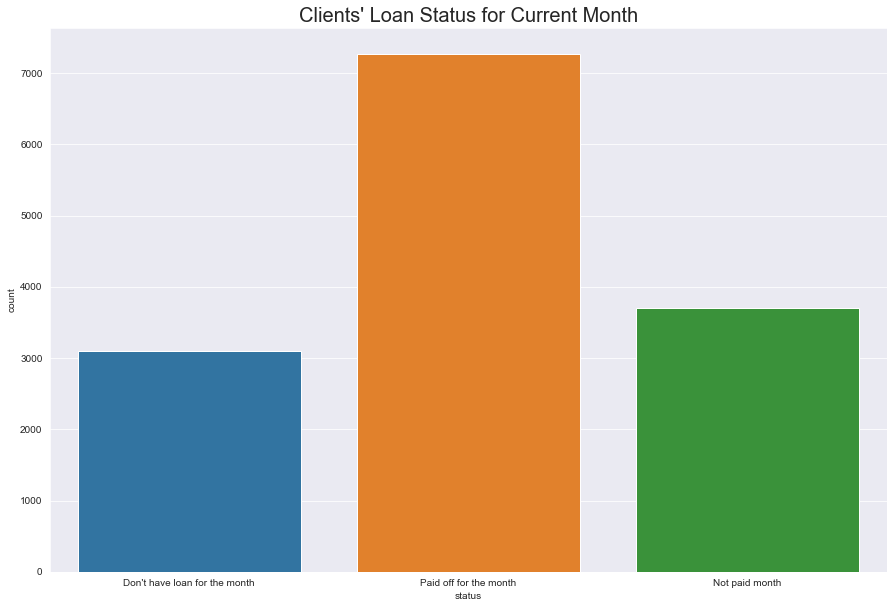

In [52]:
fig, bar = plt.subplots(figsize = (15,10))
sns.countplot(x = paying_series)
plt.title("Clients' Loan Status for Current Month", size =20)

In [53]:
#let's filter all closed loans
open_loans = X[~(X['status'] < -1)]

<ipython-input-57-ffe8936d21fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_loans['paying_status'] = open_loans['status'].apply(is_paid)


(0.0, 19.0)

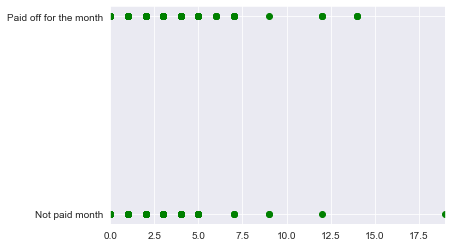

In [57]:
#let's see if there's a correlation between the number of children and the possibility of paying in time
open_loans['paying_status'] = open_loans['status'].apply(is_paid)
plt.scatter(y=open_loans['paying_status'],x=open_loans['cnt_children'],color="green") # Plot a graph with X_test vs y_test
plt.xlim(0,19)
